In [81]:
import pandas as pd
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt
import seaborn as sn
import scipy.stats as stats
from scipy.stats import skew,norm,kurtosis,chi2,chi2_contingency

#      A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions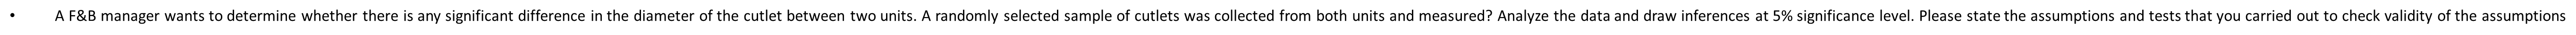

In [2]:
hypo=pd.read_csv("Cutlets.csv")
hypo

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


In [3]:
hypo.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [5]:
unitA=hypo.iloc[:,:1]
unitb=hypo.iloc[:,1]

In [7]:
m=unitA.mean()
std=unitA.std()
m1=unitb.mean()
std1=unitb.std()

In [13]:
t_stat,p_value=stats.ttest_ind(unitA,unitb)
p_value

array([0.47223947])

In [15]:
alpha = 0.05


In [94]:
 if p_value < alpha:
    print("There is a significant difference in the mean diameters (reject H0)")
else:
    print("There is no significant difference in the mean diameters (fail to reject H0)")


There is a significant difference in the mean diameters (reject H0)


# A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
   
  Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.


In [17]:
data=pd.read_csv('LabTAT.csv')

In [18]:
data

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


In [19]:
lab1=data.iloc[:,0]
lab2=data.iloc[:,1]
lab3=data.iloc[:,2]
lab4=data.iloc[:,3]

In [27]:
f_statistic, p_value = stats.f_oneway(lab1, lab2, lab3, lab4)
f_statistic, p_value

(118.70421654401437, 2.1156708949992414e-57)

In [22]:
alpha = 0.05

In [23]:
if p_value < alpha:
    print("There is a significant difference in average TAT among the laboratories (reject H0)")
else:
    print("There is no significant difference in average TAT among the laboratories (fail to reject H0)")


There is a significant difference in average TAT among the laboratories (reject H0)


#      TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences
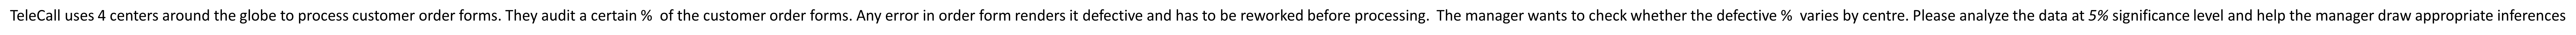

In [60]:
data=pd.read_csv('Costomer+OrderForm.csv')
data

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [66]:

data['Phillippines'].value_counts()

Error Free    271
Defective      29
Name: Phillippines, dtype: int64

In [67]:
data.India.value_counts()

Error Free    280
Defective      20
Name: India, dtype: int64

In [68]:
data.Indonesia.value_counts()

Error Free    267
Defective      33
Name: Indonesia, dtype: int64

In [69]:
data.Malta.value_counts()

Error Free    269
Defective      31
Name: Malta, dtype: int64

In [73]:
observed = ([[271,280,267,269],[29,20,33,31]])  
observed


[[271, 280, 267, 269], [29, 20, 33, 31]]

In [75]:
stat, p, dof, expected = chi2_contingency([[271,267,269,280],[29,33,31,20]])
stat,p,dof,expected

(3.858960685820355,
 0.2771020991233135,
 3,
 array([[271.75, 271.75, 271.75, 271.75],
        [ 28.25,  28.25,  28.25,  28.25]]))

In [85]:
alpha = 0.05


In [84]:

if p < alpha:
    print("There is a significant difference in average TAT among the laboratories (reject H0)")
else:
    print("There is no significant difference in average TAT among the laboratories (fail to reject H0)")


There is no significant difference in average TAT among the laboratories (fail to reject H0)


# Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.

In [88]:
data=pd.read_csv("BuyerRatio.csv")
data

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [89]:
observed = ([[50,142,131,70],[435,1523,1356,750]])  
observed

[[50, 142, 131, 70], [435, 1523, 1356, 750]]

In [91]:
stat, p, dof, expected = chi2_contingency([[50,142,131,70],[435,1523,1356,750]])
stat,p,dof,expected

(1.595945538661058,
 0.6603094907091882,
 3,
 array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
        [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

In [92]:
alpha = 0.05

In [93]:
if p < alpha:
    print("There is a significant difference in average TAT among the laboratories (reject H0)")
else:
    print("There is no significant difference in average TAT among the laboratories (fail to reject H0)")


There is no significant difference in average TAT among the laboratories (fail to reject H0)
